## Prediction on Titanic Data Set

### Problems Statement:

To build  a  classifier  algorithm  to  predict  who  would  survive  the  crash.  10+  models development using below and other techniques and validation of KPIs using either cross validation or train/test split. End results should be to create a data frame in Python to summarize results from the 10 best models that you developed. The best model should be on the top and the worst model in the bottom of the below data frame

### Loading libraries

In [2]:
import numpy as np
#Data Processing
import pandas as pd
import sklearn
#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
from sklearn import svm
#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
## Importing the datasets
df = pd.read_excel(r"C:\Users\MRAVI\Desktop\Titanic\Titanic dataset.xls")

In [4]:
df.head()
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
#Missing Value Count
total=df.isnull().sum().sort_values(ascending=False)
per=df.isnull().sum()/df.isnull().count()*100
percentage=(round(per,2)).sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=['Total','%'])
missing_data

,Total,%
body,1188,90.76
cabin,1014,77.46
boat,823,62.87
home.dest,564,43.09
age,263,20.09
embarked,2,0.15
fare,1,0.08
ticket,0,0.00
parch,0,0.00
sibsp,0,0.00


In [9]:
#Replacing missing age value
median=df.groupby(['pclass'])['age'].median()
median
df=df.set_index(['pclass'])
df['age']=df['age'].fillna(median)
df=df.reset_index()
pd.isnull(df["age"]).any()
pd.isnull(df["age"]).sum()

pclass
1    39.0
2    29.0
3    24.0
Name: age, dtype: float64

False

0

In [10]:
#Replacing missing value of embarkment 
common_value='S'
df['embarked']=df['embarked'].fillna(common_value)
pd.isnull(df['embarked']).any()
pd.isnull(df['embarked']).sum()

False

0

In [11]:
#Replacing missing fare value
median_fare =df.groupby(['pclass'])['fare'].median()
median_fare
df=df.set_index(['pclass'])
df['fare']=df['fare'].fillna(median)
df=df.reset_index()
pd.isnull(df["fare"]).any()
pd.isnull(df["fare"]).sum()

pclass
1    60.0000
2    15.0458
3     8.0500
Name: fare, dtype: float64

False

0

col_0,Frequency
pclass,
1,323
2,277
3,709


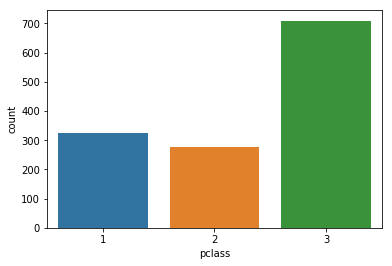

In [12]:
#Univariate Analysis
pd.crosstab(index=df.pclass,columns='Frequency')
sns.countplot(x=df.pclass)

col_0,Frequency
survived,
0,809
1,500


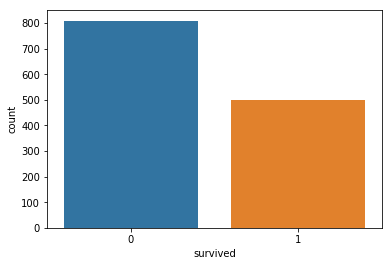

In [13]:
pd.crosstab(index=df.survived,columns='Frequency')
sns.countplot(x=df.survived)

col_0,Frequency
sex,
female,466
male,843


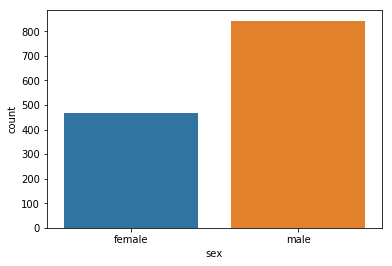

In [14]:
pd.crosstab(index=df.sex,columns='Frequency')
sns.countplot(x=df.sex)

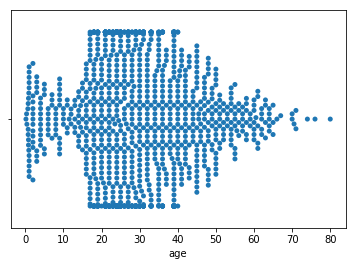

In [15]:
sns.swarmplot(x=df.age)

col_0,Frequency
sibsp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


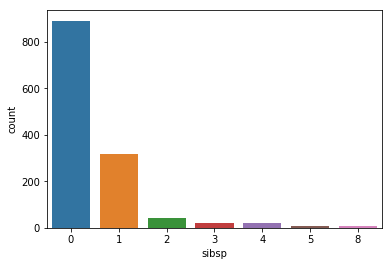

In [16]:
pd.crosstab(index=df.sibsp,columns='Frequency')
sns.countplot(x=df.sibsp)

col_0,Frequency
parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


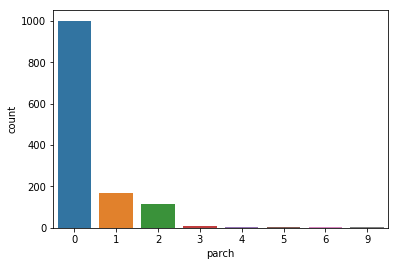

In [17]:
pd.crosstab(index=df.parch,columns='Frequency')
sns.countplot(x=df.parch)

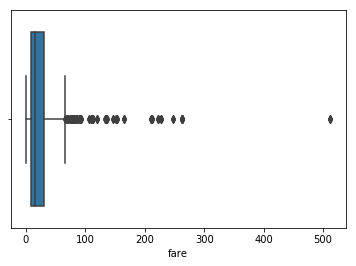

In [18]:
sns.boxplot(x=df.fare)

col_0,Frequency
embarked,
C,270
Q,123
S,916


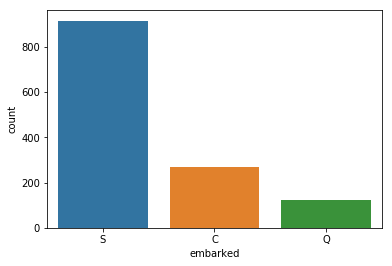

In [19]:
pd.crosstab(index=df.embarked,columns='Frequency')
sns.countplot(x=df.embarked)

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Female')

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


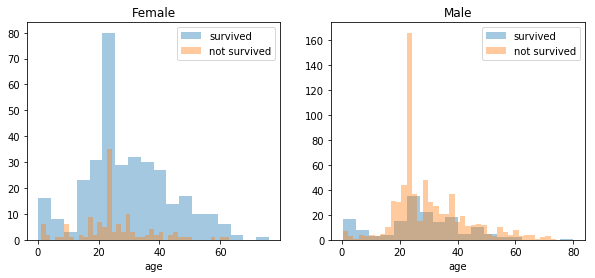

In [21]:
#Multivariate Analysis
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


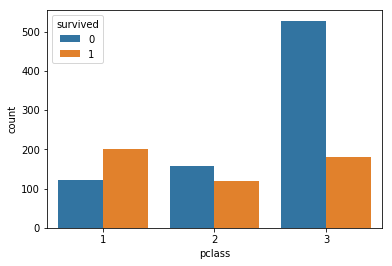

In [22]:
pd.crosstab(index=df.pclass,columns=df.survived)
sns.countplot(x=df.pclass,hue=df.survived)

survived           0    1
embarked pclass          
C        1        44   97
         2        12   16
         3        64   37
Q        1         1    2
         2         5    2
         3        73   40
S        1        78  101
         2       141  101
         3       391  104

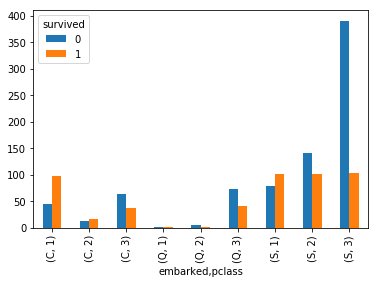

In [23]:
c=pd.pivot_table(df,index=(df.embarked,df.pclass),columns=df.survived,aggfunc='size')
c
c.plot.bar(stacked=False)

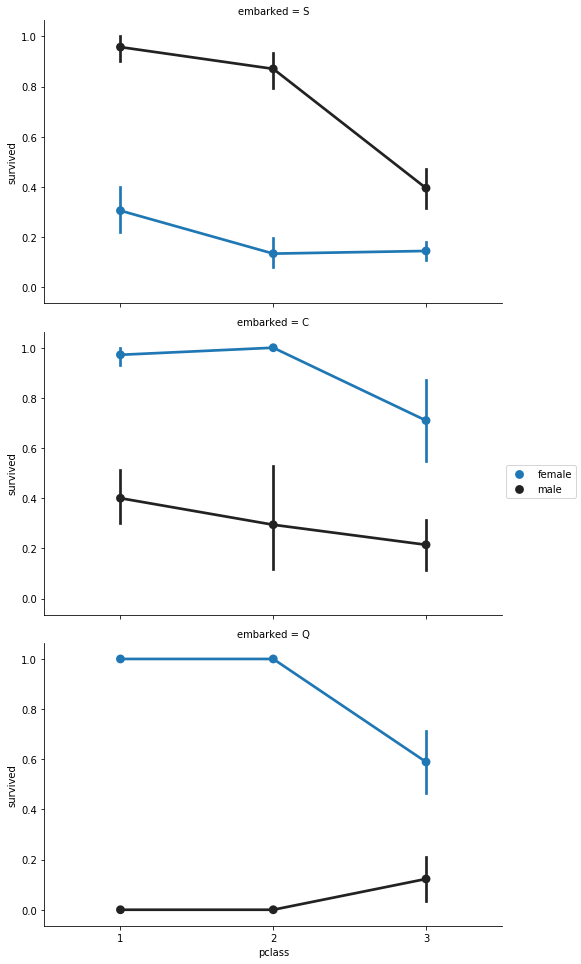

In [24]:
FacetGrid = sns.FacetGrid(df, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

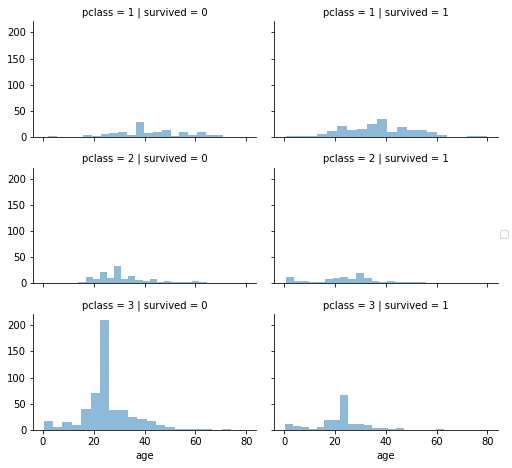

In [25]:
grid = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend();

In [26]:
#Extracting new feature from the variable cabin
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":8,"U":9}
data=[df]

for dataset in data:
    dataset['cabin']=dataset['cabin'].fillna("U0")
    dataset['deck']=dataset['cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck']=dataset['deck'].map(deck)
    dataset['deck']=dataset['deck'].fillna(0)
    dataset['deck']=dataset['deck'].astype(int)

In [27]:
df.deck.value_counts().sort_index()

1      22
2      65
3      94
4      46
5      41
6      21
7       5
8       1
9    1014
Name: deck, dtype: int64

survived,0,1
deck,,
1,11,11
2,18,47
3,37,57
4,14,32
5,11,30
6,8,13
7,2,3
8,1,0
9,707,307


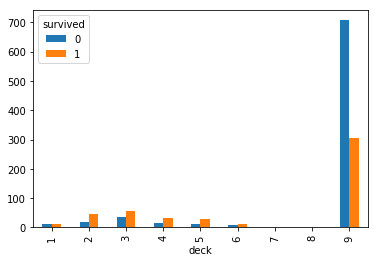

In [28]:
a=pd.crosstab(index=df.deck,columns=df.survived);a
a.plot.bar(stacked=False)

In [29]:
#Converting fare from floating vaariable into integer
data=[df]
for dataset in data:
    dataset['fare']= dataset['fare'].astype(int)

In [30]:
#Converting categorical variable in to numeric 
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [31]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [32]:
data=[df]
for dataset in data:
    dataset['age']=dataset['age'].astype(int)
    dataset.loc[dataset['age']<=11,'age'] = 0
    dataset.loc[(dataset['age']>11) & (dataset['age']<=18),'age']=1
    dataset.loc[(dataset['age']>18) & (dataset['age']<=22),'age']=2
    dataset.loc[(dataset['age']>22) & (dataset['age']<= 27),'age']=3
    dataset.loc[(dataset['age']>27) & (dataset['age']<= 33),'age']=4
    dataset.loc[(dataset['age']>33) & (dataset['age']<= 40),'age']=5
    dataset.loc[(dataset['age']>40) & (dataset['age']<= 66),'age']=6
    dataset.loc[dataset['age']>66,'age']=7

In [33]:
data=[df]
for dataset in data:
    dataset.loc[dataset['fare']<=7.91, 'fare']=0
    dataset.loc[(dataset['fare']>7.91) & (dataset['fare']<=14.454),'fare']=1
    dataset.loc[(dataset['fare']>14.454) & (dataset['fare']<=31),'fare']=2
    dataset.loc[(dataset['fare']>31) & (dataset['fare']<=99),'fare']=3
    dataset.loc[(dataset['fare']>99) & (dataset['fare']<=250),'fare']=4
    dataset.loc[dataset['fare']>250,'fare']=5
    dataset['fare']=dataset['fare'].astype(int)

In [34]:
#Dropping variabels from the dataframe
df=df.drop(['name','ticket','boat','body','home.dest','cabin'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null int32
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null int32
embarked    1309 non-null int64
deck        1309 non-null int32
dtypes: int32(3), int64(6)
memory usage: 76.8 KB


In [35]:
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,deck
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.355997,3.466769,0.498854,0.385027,1.526356,0.394194,7.729565
std,0.837836,0.486055,0.478997,1.765669,1.041658,0.865560,1.268997,0.653499,2.454520
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,9.000000
75%,3.000000,1.000000,1.000000,5.000000,1.000000,0.000000,2.000000,1.000000,9.000000
max,3.000000,1.000000,1.000000,7.000000,8.000000,9.000000,5.000000,2.000000,9.000000


In [37]:
a=df.corr()
a

,pclass,survived,sex,age,sibsp,parch,fare,embarked,deck
pclass,1.000000,-0.312469,-0.124617,-0.422316,0.060832,0.018322,-0.699782,0.038875,0.734749
survived,-0.312469,1.000000,0.528693,-0.026177,-0.027825,0.082660,0.297259,0.098450,-0.287591
sex,-0.124617,0.528693,1.000000,-0.062838,0.109609,0.213125,0.239878,0.120423,-0.125487
age,-0.422316,-0.026177,-0.062838,1.000000,-0.218564,-0.147699,0.176541,-0.017792,-0.298263
sibsp,0.060832,-0.027825,0.109609,-0.218564,1.000000,0.373587,0.332731,-0.073461,0.007952
parch,0.018322,0.082660,0.213125,-0.147699,0.373587,1.000000,0.355479,-0.095523,-0.034438
fare,-0.699782,0.297259,0.239878,0.176541,0.332731,0.355479,1.000000,-0.076149,-0.573784
embarked,0.038875,0.098450,0.120423,-0.017792,-0.073461,-0.095523,-0.076149,1.000000,-0.050263
deck,0.734749,-0.287591,-0.125487,-0.298263,0.007952,-0.034438,-0.573784,-0.050263,1.000000


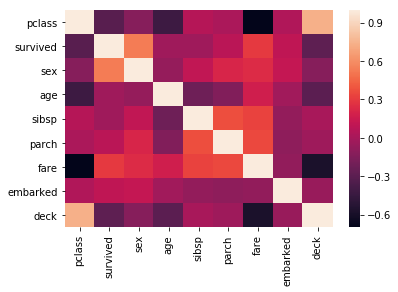

In [38]:
sns.heatmap(a)

In [39]:
#Creating independent and dependent variable
x=df.drop('survived',axis=1)
y=df['survived']
x.head()
x.shape
y.head()
y.shape

,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,1,1,4,0,0,4,0,2
1,1,0,0,1,2,4,0,3
2,1,1,0,1,2,4,0,3
3,1,0,4,1,2,4,0,3
4,1,1,3,1,2,4,0,3


(1309, 8)

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

(1309,)

In [40]:
#Creating train and test data 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.15,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(1112, 8)

(197, 8)

(1112,)

(197,)

In [41]:
test_y.value_counts()

0    118
1     79
Name: survived, dtype: int64

### LOGISTIC REGRESSION


In [64]:
#Build a Logistic regression model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [65]:
log.fit(train_x,train_y)

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
log.coef_

array([[-0.62822654,  2.33490548, -0.24824888, -0.36569685, -0.0320241 ,
         0.24717631,  0.16444366, -0.09309979]])

In [67]:
#Generate Model Diagnostics
classes=log.predict(test_x)
print(classes.size)
print('Positive Cases in Test Data:',test_y[test_y==1].shape[0])
print('Negative Cases in Test Data:',test_y[test_y==0].shape[0])

197
Positive Cases in Test Data: 79
Negative Cases in Test Data: 118


In [68]:
acc_log = round(log.score(test_x, test_y)*100,2)
acc_log

82.74

In [69]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc_log=metrics.roc_auc_score(test_y,classes)
auc_log

Accuracy Score
0.8274111675126904
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       118
           1       0.81      0.75      0.78        79

   micro avg       0.83      0.83      0.83       197
   macro avg       0.82      0.81      0.82       197
weighted avg       0.83      0.83      0.83       197

AUC


0.8140956876206823

In [70]:
prec_log=round(precision_score(test_y,classes),2)
prec_log
recall_log=round(recall_score(test_y,classes),2)
recall_log

0.81

0.75

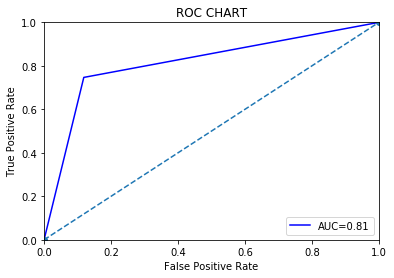

In [71]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


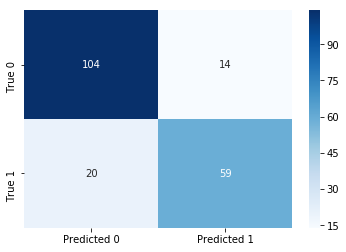

In [74]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [75]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_index(ascending=True)

,Variable,Coeff
0,pclass,-0.628227
1,sex,2.334905
2,age,-0.248249
3,sibsp,-0.365697
4,parch,-0.032024
5,fare,0.247176
6,embarked,0.164444
7,deck,-0.093100


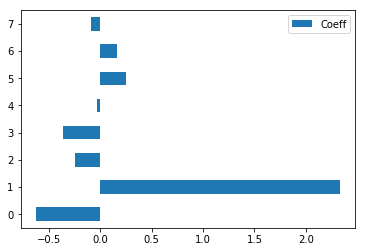

In [76]:
#Feature Importance
coeff.plot(kind='barh')
plt.show();

### SUPPORT VECTOR CLASSIFIER

In [77]:
#Build the model
linear_svc = LinearSVC()

In [78]:
#Fitting Model
linear_svc.fit(train_x,train_y)

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [79]:
#Applying our learnt model on test data
y_pred_test = linear_svc.predict(test_x)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [80]:
#Generating accuracy score
metrics.accuracy_score(test_y,y_pred_test)

0.8324873096446701

In [81]:
acc_svc = round(linear_svc.score(test_x, test_y)*100,2)
acc_svc

83.25

In [82]:
auc_svc=metrics.roc_auc_score(test_y,y_pred_test)
auc_svc
prec_svc=round(precision_score(test_y,y_pred_test),2)
prec_svc
recall_svc=round(recall_score(test_y,y_pred_test),2)
recall_svc

0.820424801544733

0.81

0.76

In [83]:
#Create Confusion Matrix
conf = metrics.confusion_matrix(test_y,y_pred_test)
conf

array([[104,  14],
       [ 19,  60]], dtype=int64)

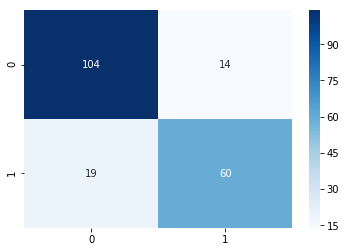

In [84]:
#Plotting confusion matrix
cmap=sns.cubehelix_palette(50, hue=0.05, rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap="Blues",xticklabels=['0','1'],yticklabels=['0','1'],annot=True,fmt="d")
plt.show();

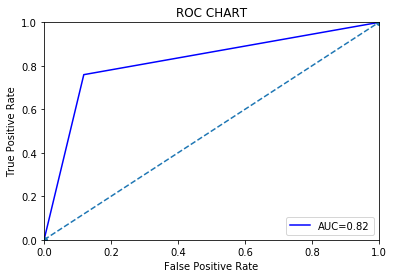

In [86]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,y_pred_test)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [87]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(linear_svc.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_index(ascending=True)

,Variable,Coeff
0,pclass,-0.234427
1,sex,0.933372
2,age,-0.088659
3,sibsp,-0.125137
4,parch,-0.000912
5,fare,0.063789
6,embarked,0.054259
7,deck,-0.038585


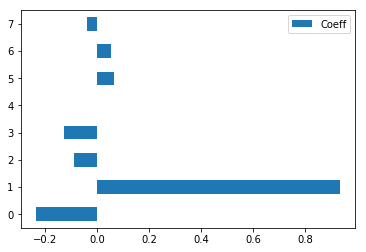

In [88]:
coeff.plot(kind='barh')
plt.show();

### Stochastic Gradient Descent (SGD)

In [90]:
#Build the model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

In [91]:
#Fit the model
sgd.fit(train_x, train_y)

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
sgd.coef_

array([[-28.96783046, 121.96981247,  -6.09849062, -27.44320781,
          6.09849062,   4.57386797,   1.52462266,  -7.62311328]])

In [93]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(sgd.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Variable",ascending=True)

,Variable,Coeff
2,age,-6.098491
7,deck,-7.623113
6,embarked,1.524623
5,fare,4.573868
4,parch,6.098491
0,pclass,-28.967830
1,sex,121.969812
3,sibsp,-27.443208


In [94]:
sgd.intercept_

array([60.01742677])

In [95]:
#Generating Model Diagnostics
y_pred = sgd.predict(test_x)

In [96]:
#Generating Accuracy Score
acc_sgd = round(sgd.score(test_x, test_y)*100,2)
acc_sgd

82.23

In [97]:
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

78.33

In [98]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,y_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,y_pred))
print("AUC")
auc_sgd=metrics.roc_auc_score(test_y,y_pred)
auc_sgd

Accuracy Score
0.8223350253807107
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       118
           1       0.84      0.68      0.76        79

   micro avg       0.82      0.82      0.82       197
   macro avg       0.83      0.80      0.81       197
weighted avg       0.82      0.82      0.82       197

AUC


0.799399270542802

In [99]:
prec_sgd=round(precision_score(test_y,y_pred),2)
prec_sgd
recall_sgd=round(recall_score(test_y,y_pred),2)
recall_sgd

0.84

0.68

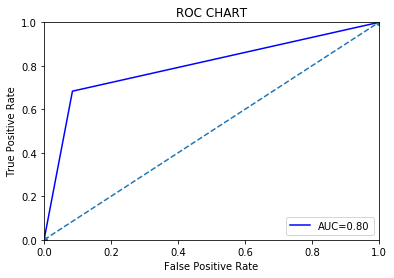

In [100]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,y_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [101]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(sgd.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_index(ascending=True)

,Variable,Coeff
0,pclass,-28.967830
1,sex,121.969812
2,age,-6.098491
3,sibsp,-27.443208
4,parch,6.098491
5,fare,4.573868
6,embarked,1.524623
7,deck,-7.623113


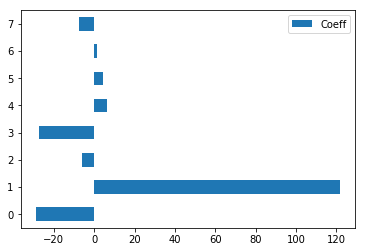

In [102]:
coeff.plot(kind='barh')
plt.show();

Confusion Matrix


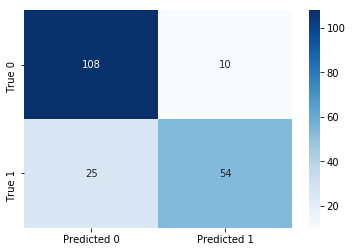

In [105]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,y_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [106]:
sgd.coef_

array([[-28.96783046, 121.96981247,  -6.09849062, -27.44320781,
          6.09849062,   4.57386797,   1.52462266,  -7.62311328]])

### K Nearest Neighbor

In [107]:
#Build a model
knn = KNeighborsClassifier(n_neighbors = 3)

In [108]:
#Fit a model
knn.fit(train_x,train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [109]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')>

In [110]:
#Model Diagnosis
knn_pred = knn.predict(test_x)

In [111]:
#Genearting Accuracy Score
acc_knn=round(knn.score(test_x,test_y)*100,2)
acc_knn

74.11

In [112]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,knn_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,knn_pred))
print("AUC")
auc_knn=metrics.roc_auc_score(test_y,knn_pred)
auc_knn

Accuracy Score
0.7411167512690355
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       118
           1       0.69      0.63      0.66        79

   micro avg       0.74      0.74      0.74       197
   macro avg       0.73      0.72      0.73       197
weighted avg       0.74      0.74      0.74       197

AUC


0.7232353572194808

In [113]:
prec_knn=round(precision_score(test_y,knn_pred),2)
prec_knn
recall_knn=round(recall_score(test_y,knn_pred),2)
recall_knn

0.69

0.63

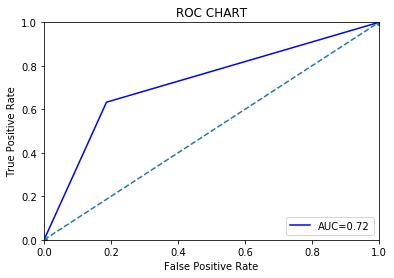

In [114]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,knn_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


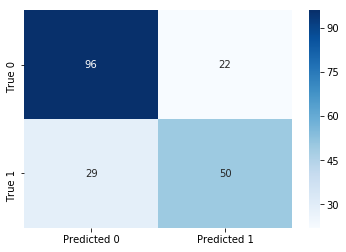

In [116]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,knn_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### Gaussian Naive Bayes

In [117]:
#Build a model
gaussian = GaussianNB()

In [118]:
#Fit a model
gaussian.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
#Model Diagnosis
gaus_pred=gaussian.predict(test_x)

In [120]:
#Generating accuarcy score
acc_gaussian=round(gaussian.score(test_x,test_y)*100,2)
acc_gaussian

76.65

In [121]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,gaus_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,gaus_pred))
print("AUC")
auc_gaussian=metrics.roc_auc_score(test_y,gaus_pred)
auc_gaussian

Accuracy Score
0.766497461928934
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.70      0.73      0.72        79

   micro avg       0.77      0.77      0.77       197
   macro avg       0.76      0.76      0.76       197
weighted avg       0.77      0.77      0.77       197

AUC


0.7611564042051061

In [122]:
prec_gaussian=round(precision_score(test_y,gaus_pred),2)
prec_gaussian
recall_gaussian=round(recall_score(test_y,gaus_pred),2)
recall_gaussian

0.7

0.73

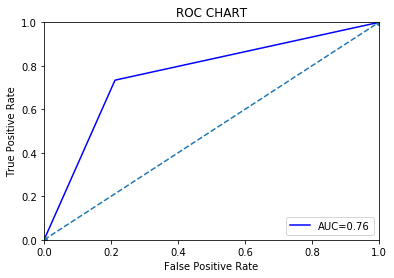

In [123]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,gaus_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


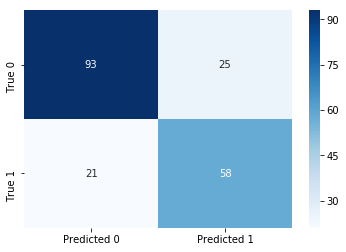

In [125]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,gaus_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### DECISION TREE

In [126]:
#Build a model
decision_tree = DecisionTreeClassifier()

In [127]:
#Fit the model
decision_tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
#Predict on test data
decision_pred= decision_tree.predict(test_x)

In [129]:
#Generating accuracy score
acc_decision_tree=round(decision_tree.score(test_x,test_y)*100,2)
acc_decision_tree

78.68

In [130]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,decision_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,decision_pred))
print("AUC")
auc_decision=metrics.roc_auc_score(test_y,decision_pred)
auc_decision

Accuracy Score
0.7868020304568528
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       118
           1       0.77      0.67      0.72        79

   micro avg       0.79      0.79      0.79       197
   macro avg       0.78      0.77      0.77       197
weighted avg       0.79      0.79      0.78       197

AUC


0.7676464278051921

In [131]:
prec_decision=round(precision_score(test_y,decision_pred),2)
prec_decision
recall_decision=round(recall_score(test_y,decision_pred),2)
recall_decision

0.77

0.67

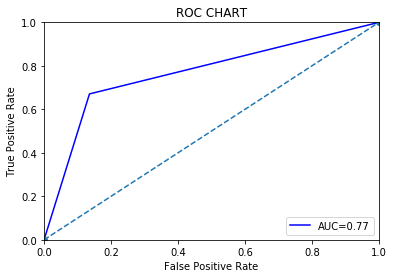

In [132]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,decision_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


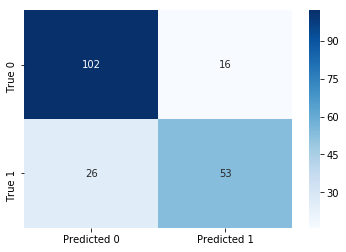

In [133]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,decision_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [134]:
decision_tree.set_params

<bound method BaseEstimator.set_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

### RANDOM FOREST

In [135]:
# Build a model
random_forest = RandomForestClassifier(n_estimators=100)

In [136]:
#Fit a model
random_forest.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
#Predicting on test data
random_pred= random_forest.predict(test_x)

In [138]:
#Generating accuracy score
acc_random_forest=round(random_forest.score(test_x,test_y)*100,2)
acc_random_forest

77.66

In [139]:
random_forest.score(train_x, train_y)

0.9037769784172662

In [140]:
random_forest.score(test_x, test_y)

0.7766497461928934

In [141]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,random_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,random_pred))
print("AUC")
auc_random=metrics.roc_auc_score(test_y,random_pred)
auc_random

Accuracy Score
0.7766497461928934
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       118
           1       0.75      0.66      0.70        79

   micro avg       0.78      0.78      0.78       197
   macro avg       0.77      0.76      0.76       197
weighted avg       0.77      0.78      0.77       197

AUC


0.7570800257455481

In [142]:
prec_random=round(precision_score(test_y,random_pred),2)
prec_random
recall_random=round(recall_score(test_y,random_pred),2)
recall_random

0.75

0.66

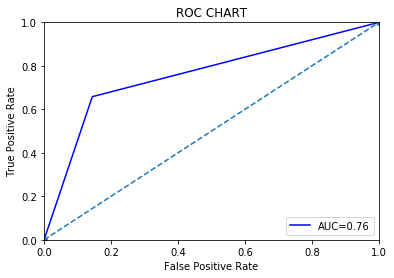

In [143]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,random_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


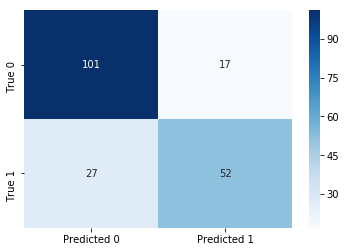

In [145]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,random_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### PERCEPTRON

In [146]:
#Build a model
perceptron = Perceptron(max_iter=5)

In [147]:
#Fit a model
perceptron.fit(train_x,train_y)

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=5, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
#Predicting on test data
percep_pred = perceptron.predict(test_x)

In [149]:
perceptron.score(train_x,train_y)

0.7823741007194245

In [150]:
#Generating accuracy score
acc_perceptron=round(perceptron.score(test_x,test_y)*100,2)
acc_perceptron

80.71

In [151]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,percep_pred))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,percep_pred))
print("AUC")
auc_perceptron=metrics.roc_auc_score(test_y,percep_pred)
auc_perceptron

Accuracy Score
0.8071065989847716
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       118
           1       0.84      0.65      0.73        79

   micro avg       0.81      0.81      0.81       197
   macro avg       0.82      0.78      0.79       197
weighted avg       0.81      0.81      0.80       197

AUC


0.78041192877065

In [152]:
prec_perceptron=round(precision_score(test_y,percep_pred),2)
recall_perceptron=round(recall_score(test_y,percep_pred),2)

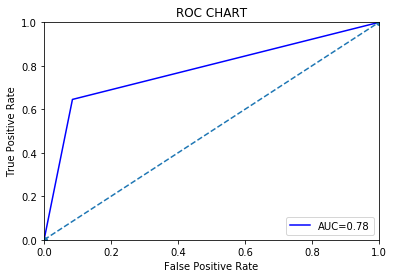

In [154]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,percep_pred)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


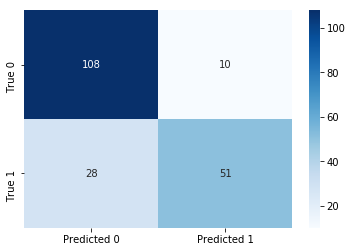

In [156]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,percep_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### Linear Discriminant Analysis

In [157]:
#Build a model
lda=LinearDiscriminantAnalysis()

In [158]:
#Fit a model
lda.fit(train_x,train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [159]:
#Predicting on test data
lda_predict=lda.predict(test_x)

In [160]:
#Generating accuracy score
acc_lda=round(lda.score(test_x,test_y)*100,2)
acc_lda

82.74

In [161]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,lda_predict))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,lda_predict))
print("AUC")
auc_lda=metrics.roc_auc_score(test_y,lda_predict)
auc_lda

Accuracy Score
0.8274111675126904
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       118
           1       0.80      0.76      0.78        79

   micro avg       0.83      0.83      0.83       197
   macro avg       0.82      0.82      0.82       197
weighted avg       0.83      0.83      0.83       197

AUC


0.8161875134091396

In [162]:
prec_lda=round(precision_score(test_y,lda_predict),2)
prec_lda
recall_lda=round(recall_score(test_y,lda_predict),2)
recall_lda

0.8

0.76

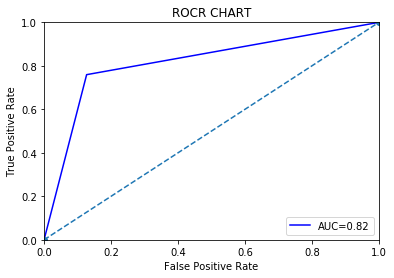

In [163]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,lda_predict)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


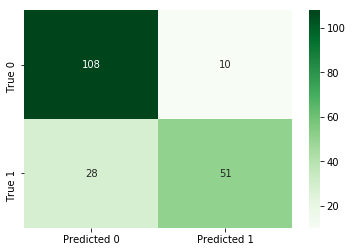

In [164]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,percep_pred)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### AdaBoost Classifier

In [165]:
#Build a model

ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

In [166]:
#Fit a model
ada.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [167]:
#Predict on the test data
ada_predict=ada.predict(test_x)

In [168]:
#Generating accuracy score
acc_ada=round(ada.score(test_x,test_y)*100,2)
acc_ada

81.22

In [169]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,ada_predict))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,ada_predict))
print("AUC")
auc_ada=metrics.roc_auc_score(test_y,ada_predict)
auc_ada

Accuracy Score
0.8121827411167513
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       118
           1       0.77      0.76      0.76        79

   micro avg       0.81      0.81      0.81       197
   macro avg       0.80      0.80      0.80       197
weighted avg       0.81      0.81      0.81       197

AUC


0.80347564900236

In [170]:
prec_ada=round(precision_score(test_y,ada_predict),2)
prec_ada
recall_ada=round(recall_score(test_y,ada_predict),2)
recall_ada

0.77

0.76

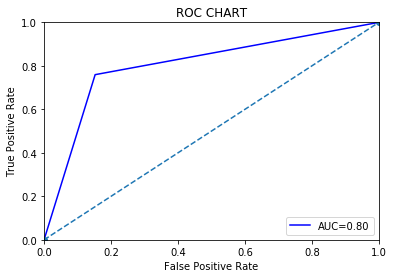

In [176]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,ada_predict)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROC CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


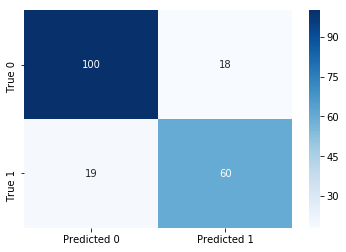

In [175]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,ada_predict)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### Results

In [174]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree','Linear Discriminant Analysis','AdaBoost Classifier'],
    'Accuracy': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, acc_lda,acc_ada],
    'AUC':[auc_svc,auc_knn,auc_log,auc_random,auc_gaussian,
                 auc_perceptron,auc_sgd,auc_decision, auc_lda,auc_ada],
    'Precision': [prec_svc,prec_knn,prec_log,prec_random,prec_gaussian,
                  prec_perceptron,prec_sgd,prec_decision,prec_lda,prec_ada],
    'Recall':[recall_svc,recall_knn,recall_log,recall_random,recall_gaussian,
              recall_perceptron,recall_sgd,recall_decision,recall_lda,recall_ada]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(15)

,Accuracy,AUC,Precision,Recall
Model,,,,
Support Vector Machines,83.25,0.820425,0.81,0.76
Linear Discriminant Analysis,82.74,0.816188,0.80,0.76
Logistic Regression,82.74,0.814096,0.81,0.75
AdaBoost Classifier,81.22,0.803476,0.77,0.76
Stochastic Gradient Decent,78.33,0.799399,0.84,0.68
Perceptron,80.71,0.780412,0.84,0.65
Decision Tree,78.68,0.767646,0.77,0.67
Naive Bayes,76.65,0.761156,0.70,0.73
Random Forest,77.66,0.757080,0.75,0.66
